## Import and Inspect the Data

**Import modules**

In [1]:
import numpy as np
import pandas as pd

**Read in and look at data**

In [3]:
h = pd.read_csv('height.csv');h

,Person ID,Gender,Height
0,8872,Female,61.864667
1,7456,Female,62.819752
2,4841,Male,70.695001
3,17,Male,63.974326
4,7334,Female,66.138172
...,...,...,...
9995,398,Male,67.266363
9996,785,Male,69.297292
9997,9487,Female,63.628666
9998,8875,Female,66.837536


**Other options (e.g. first 10 and las10 lines)**

In [4]:
h.head(10)

,Person ID,Gender,Height
0,8872,Female,61.864667
1,7456,Female,62.819752
2,4841,Male,70.695001
3,17,Male,63.974326
4,7334,Female,66.138172
5,9260,Female,67.600646
6,9646,Female,67.152756
7,1004,Male,68.238745
8,6136,Female,65.383312
9,1127,Male,70.566064


In [5]:
h.tail(10)

,Person ID,Gender,Height
9990,6186,Female,69.626262
9991,6553,Female,68.874269
9992,2417,Male,63.154272
9993,1739,Male,69.762879
9994,3975,Male,72.934767
9995,398,Male,67.266363
9996,785,Male,69.297292
9997,9487,Female,63.628666
9998,8875,Female,66.837536
9999,7202,Female,63.993617


In [6]:
h.describe()

,Person ID,Height
count,10000.00000,10000.000000
mean,4999.50000,66.367560
std,2886.89568,3.847528
min,0.00000,54.263133
25%,2499.75000,63.505620
50%,4999.50000,66.318070
75%,7499.25000,69.174262
max,9999.00000,78.998742


**These look good, but I suspect in inches. Let's convert**

In [7]:
h['Height'] = 2.54*h['Height']

In [8]:
h.describe()

,Person ID,Height
count,10000.00000,10000.000000
mean,4999.50000,168.573602
std,2886.89568,9.772721
min,0.00000,137.828359
25%,2499.75000,161.304276
50%,4999.50000,168.447898
75%,7499.25000,175.702625
max,9999.00000,200.656806


**Looks like a mix of genders, but may not always be obvious (e.g. first and last 5 rows all male)**

In [9]:
h['Gender'].unique()

array(['Female', 'Male'], dtype=object)

**Split genders into two new dataframes**

In [12]:
m = h[h['Gender'] == "Male"]; m

,Person ID,Gender,Height
2,4841,Male,179.565303
3,17,Male,162.494787
7,1004,Male,173.326413
9,1127,Male,179.237802
10,11,Male,181.967645
...,...,...,...
9992,2417,Male,160.411852
9993,1739,Male,177.197712
9994,3975,Male,185.254309
9995,398,Male,170.856561


In [13]:
f = h[h['Gender'] == "Female"]; f

,Person ID,Gender,Height
0,8872,Female,157.136254
1,7456,Female,159.562170
4,7334,Female,167.990958
5,9260,Female,171.705641
6,9646,Female,170.568000
...,...,...,...
9990,6186,Female,176.850706
9991,6553,Female,174.940642
9997,9487,Female,161.616812
9998,8875,Female,169.767341


In [14]:
m.describe()

,Person ID,Height
count,5000.000000,5000.000000
mean,2499.500000,175.326919
std,1443.520003,7.272940
min,0.000000,148.353539
25%,1249.750000,170.623685
50%,2499.500000,175.330380
75%,3749.250000,180.311409
max,4999.000000,200.656806


**Bring in the weight data**

In [33]:
w = pd.read_csv('weight.csv');w

,Person ID,Gender,Weight
0,2804,Male,156.445475
1,2013,Male,219.877298
2,5116,Female,142.421776
3,4251,Male,179.697919
4,8069,Female,121.033728
...,...,...,...
9995,3503,Male,175.192721
9996,4637,Male,117.803842
9997,9095,Female,140.799489
9998,5889,Female,148.938464


**Merge the data**

In [39]:
h_w = pd.merge(h, w, on = ['Person ID'])
del h_w['Gender_y']
h_w = h_w.rename(columns={'Gender_x': 'Gender'}); 
h_w['Weight'] = h_w['Weight']/2.20462 
h_w

,Person ID,Gender,Height,Weight
0,8872,Female,157.136254,56.247422
1,7456,Female,159.562170,56.899228
2,4841,Male,179.565303,87.101535
3,17,Male,162.494787,78.418716
4,7334,Female,167.990958,68.983826
...,...,...,...,...
9995,398,Male,170.856561,87.303376
9996,785,Male,176.015121,89.520534
9997,9487,Female,161.616812,58.567586
9998,8875,Female,169.767341,72.755088


In [40]:
h_w.describe()

,Person ID,Height,Weight
count,10000.00000,10000.000000,10000.000000
mean,4999.50000,168.573602,73.228201
std,2886.89568,9.772721,14.564160
min,0.00000,137.828359,29.347519
25%,2499.75000,161.304276,61.606105
50%,4999.50000,168.447898,73.125041
75%,7499.25000,175.702625,84.898769
max,9999.00000,200.656806,122.465413


## Visualise the Data

In [15]:
import matplotlib.pyplot as plt

**Histogram - minimum working code**

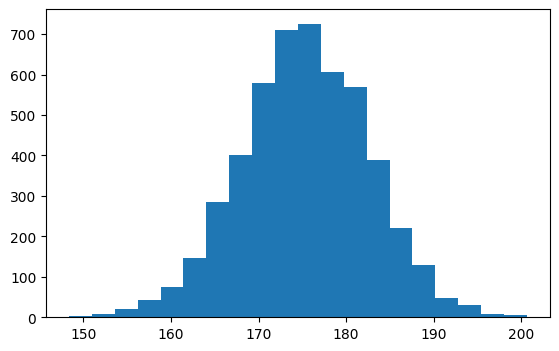

In [25]:
plt.figure(figsize=(6.5,4))
plt.hist(m["Height"], bins=20)
plt.show()

**Adding females and snazzying up a bit**

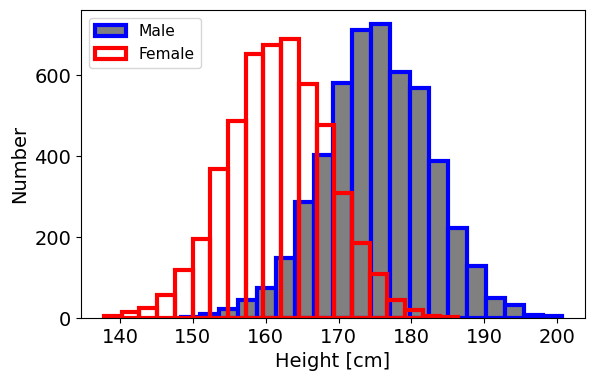

In [32]:
font = 14
plt.rcParams.update({'font.size': font})

plt.figure(figsize=(6.5,4))
plt.hist(m["Height"],bins=20,facecolor="grey", edgecolor='b', linewidth=3, label="Male")
plt.hist(f["Height"],bins=20,facecolor='none', edgecolor='r', linewidth=3, label="Female")
plt.xlabel('Height [cm]')
plt.ylabel('Number')
plt.legend(loc = 'upper left', fontsize = 0.8*font)
plt.show()

**Scatter plot of weight and height**

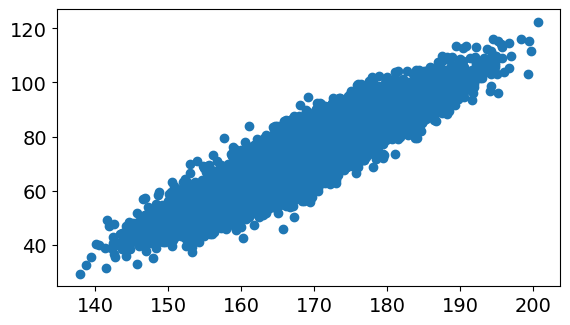

In [47]:
plt.figure(figsize=(6.5,3.6))
plt.scatter(x = h_w["Height"], y = h_w["Weight"])
plt.show()

**Again, this can be snazzier**

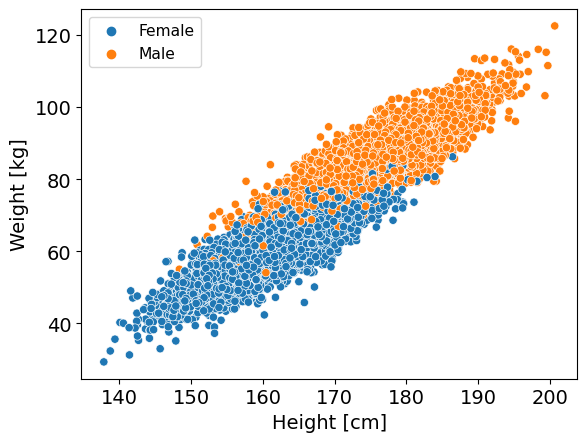

In [46]:
import seaborn as sns
sns.scatterplot(x = h_w["Height"], y = h_w["Weight"], hue = h_w['Gender'])
plt.xlabel('Height [cm]')
plt.ylabel('Weight [kg]')
plt.legend(loc = 'upper left', fontsize = 0.8*font)
plt.show()